# Adversarial counter-example for sequential source code models

In [81]:
import pathlib

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from deeplearning.deeptune.opencl.adversary import opencl_deadcode_inserter
from deeplearning.deeptune.opencl.heterogeneous_mapping import heterogeneous_mapping
from labm8 import prof
from labm8 import viz

In [54]:
experiment = heterogeneous_mapping.HeterogeneousMappingExperiment(
    '/tmp/deeplearning/deeptune/opencl/notebooks/adversary')
experiment.dataset.df.shape

(680, 18)

In [55]:
ADVERSARIAL_DF_PATH = '/var/phd/shared/deeplearning/deeptune/opencl/heterogeneous_mapping/augmented_df.pkl'
adversarial_df = pd.read_pickle(ADVERSARIAL_DF_PATH)
adversarial_df.shape

(2720, 19)

In [56]:
# Ratio of dataset sizes
len(adversarial_df) / len(experiment.dataset.df)

4.0

In [57]:
# Ratio of mutations
sum(adversarial_df['program:is_mutation']) / len(adversarial_df)

0.75

In [58]:
# ratio of unique kernels
len(set(adversarial_df['program:opencl_src'])) / len(adversarial_df['program:opencl_src'])

0.8378676470588236

In [59]:
# ratio of unique kernels
len(set(results.dataset.df['program:opencl_src'])) / len(experiment.dataset.df['program:opencl_src'])

0.36323529411764705

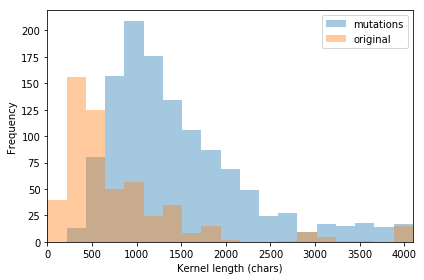

In [77]:
bins = (0, 4096, 20)

adversarial_lens = np.array(
    [len(x) for x in adversarial_df[adversarial_df['program:is_mutation'] == True]['program:opencl_src']], dtype=np.int32)
df_lens = np.array(
    [len(x) for x in adversarial_df[adversarial_df['program:is_mutation'] == False]['program:opencl_src']], dtype=np.int32)

sns.distplot(adversarial_lens, kde=False, bins=np.linspace(*bins), label='mutations')
sns.distplot(df_lens, kde=False, bins=np.linspace(*bins), label='original')
plt.xlim((bins[0], bins[1]))
plt.legend()
plt.xlabel("Kernel length (chars)")
plt.ylabel("Frequency")
viz.finalise()

In [67]:
# Longest sequences
max(df_lens), max(adversarial_lens)

(33255, 47949)

## Model

In [82]:
PACT_RESULTS_DF = '~/phd/deeplearning/deeptune/opencl/heterogeneous_mapping/results.csv'
pact_results = pd.read_csv(str(pathlib.Path(PACT_RESULTS_DF).expanduser()))
pact_results

,Model,Platform,Benchmark,Benchmark Suite,Oracle Mapping,Predicted Mapping,Correct?,Speedup
0,DeepTune,amd_tahiti_7970,ScanLargeArrays,amd-app-sdk-3.0,0,0,1,1.000000
1,DeepTuneInst2Vec,amd_tahiti_7970,ScanLargeArrays,amd-app-sdk-3.0,0,0,1,1.000000
2,Grewe et al.,amd_tahiti_7970,ScanLargeArrays,amd-app-sdk-3.0,0,0,1,1.000000
3,Static mapping,amd_tahiti_7970,ScanLargeArrays,amd-app-sdk-3.0,0,0,1,1.000000
4,DeepTune,nvidia_gtx_960,ScanLargeArrays,amd-app-sdk-3.0,1,1,1,1.000000
5,DeepTuneInst2Vec,nvidia_gtx_960,ScanLargeArrays,amd-app-sdk-3.0,1,0,0,0.114907
6,Grewe et al.,nvidia_gtx_960,ScanLargeArrays,amd-app-sdk-3.0,1,0,0,0.114907
7,Static mapping,nvidia_gtx_960,ScanLargeArrays,amd-app-sdk-3.0,1,1,1,1.000000
8,DeepTune,amd_tahiti_7970,binomial_options,amd-app-sdk-3.0,1,0,0,1.000000
9,DeepTuneInst2Vec,amd_tahiti_7970,binomial_options,amd-app-sdk-3.0,1,1,1,2.279163
